### Figure 2 upper panel lower row and Suppelementary Table 2:
recommended run in docker: docker run -it --rm -p 1977:8888 -v .Data:/Data amiklos/simnibs:1.10

In [1]:
from simnibs import sim_struct, run_simnibs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import regions as rg
import os.path
from os import path
from scipy import stats

In [154]:
cogsga = pd.read_csv('/Data/SGA.COG.csv')
volsga = pd.read_csv('/Data/VOL_SGA.csv')
cogsga

,grid,time,Overall_TScore.0,SpeedProcessing_TScore.0,Attention_Vigilance_TScore.0,Working_Memory_TScore.0,Verbal_Learning_TScore.0,Visual_Learning_TScore.0,Reason_ProblemSolv_TScore.0,Social_Cognition_TScore.0
0,e3c3b8750d0f0e1edd5ca95f11a49f80,1,9.0,26.0,22.0,22.0,29.0,19.0,26.0,26.0
1,e3c3b8750d0f0e1edd5ca95f11a49f80,2,9.0,11.0,23.0,26.0,24.0,35.0,28.0,27.0
2,83ab31ec164ec1507072b9e522422931,1,15.0,26.0,31.0,22.0,28.0,24.0,37.0,29.0
3,83ab31ec164ec1507072b9e522422931,2,5.0,17.0,18.0,18.0,22.0,12.0,46.0,22.0
4,c9e39571ab70bd3d715e2a7b93e3589b,1,37.0,42.0,44.0,64.0,34.0,30.0,34.0,47.0
5,c9e39571ab70bd3d715e2a7b93e3589b,2,36.0,40.0,43.0,53.0,40.0,41.0,27.0,47.0
6,7c84894e451f799d8e928d07e14acaca,1,-1.0,-5.0,14.0,10.0,16.0,38.0,33.0,22.0
7,7c84894e451f799d8e928d07e14acaca,2,12.0,13.0,22.0,25.0,35.0,27.0,33.0,30.0
8,a747faf8c71a33eb0ce1ed14013beae9,1,21.0,45.0,21.0,33.0,28.0,16.0,60.0,22.0
9,a747faf8c71a33eb0ce1ed14013beae9,2,11.0,30.0,20.0,21.0,29.0,21.0,44.0,18.0


In [147]:
volsga.columns[0:47].values.astype('str')


array(['X', 'grid', 'ECTnum', 'allenerg', 'Cerebellum.Cortex',
       'Thalamus.Proper', 'Caudate', 'Putamen', 'Pallidum', 'Hippocampus',
       'Amygdala', 'Accumbens.area', 'VentralDC',
       'ctx.caudalanteriorcingulate', 'ctx.caudalmiddlefrontal',
       'ctx.cuneus', 'ctx.entorhinal', 'ctx.fusiform',
       'ctx.inferiorparietal', 'ctx.inferiortemporal',
       'ctx.isthmuscingulate', 'ctx.lateraloccipital',
       'ctx.lateralorbitofrontal', 'ctx.lingual',
       'ctx.medialorbitofrontal', 'ctx.middletemporal',
       'ctx.parahippocampal', 'ctx.paracentral', 'ctx.parsopercularis',
       'ctx.parsorbitalis', 'ctx.parstriangularis', 'ctx.pericalcarine',
       'ctx.postcentral', 'ctx.posteriorcingulate', 'ctx.precentral',
       'ctx.precuneus', 'ctx.rostralanteriorcingulate',
       'ctx.rostralmiddlefrontal', 'ctx.superiorfrontal',
       'ctx.superiorparietal', 'ctx.superiortemporal',
       'ctx.supramarginal', 'ctx.frontalpole', 'ctx.temporalpole',
       'ctx.transversetem

In [83]:
labels = pd.read_table('/Data/FreeSurferColorLUT.txt',delim_whitespace=True, comment='#')
y=[x.replace('Left-','') for x in labels['Label_Name'].astype('str')]
z=[x.replace('Right-','') for x in y]
zz=[x.replace('-','.') for x in z]
zzz=[x.replace('lh.','') for x in zz]
zzzz=[x.replace('rh.','') for x in zzz]
labels['pointer']='na'
labels

,Id,Label_Name,R,G,B,A,pointer
0,0,Unknown,0,0,0,0,na
1,1,Left-Cerebral-Exterior,70,130,180,0,na
2,2,Left-Cerebral-White-Matter,245,245,245,0,na
3,3,Left-Cerebral-Cortex,205,62,78,0,na
4,4,Left-Lateral-Ventricle,120,18,134,0,na
...,...,...,...,...,...,...,...
1287,14171,wm_rh_S_suborbital,21,20,60,0,na
1288,14172,wm_rh_S_subparietal,101,60,60,0,na
1289,14173,wm_rh_S_temporal_inf,21,180,180,0,na
1290,14174,wm_rh_S_temporal_sup,223,220,60,0,na


In [84]:
m=0
for x in volsga.columns:
  i = np.where(np.array(zzzz) == x)
  for k in i:
      labels['pointer'][k]=m  
      #print(i)
  
  m=m+1
labels[0:50]

[ simnibs ]WARNING: /root/SimNIBS/miniconda3/envs/simnibs_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """



,Id,Label_Name,R,G,B,A,pointer
0,0,Unknown,0,0,0,0,na
1,1,Left-Cerebral-Exterior,70,130,180,0,na
2,2,Left-Cerebral-White-Matter,245,245,245,0,na
3,3,Left-Cerebral-Cortex,205,62,78,0,na
4,4,Left-Lateral-Ventricle,120,18,134,0,na
5,5,Left-Inf-Lat-Vent,196,58,250,0,na
6,6,Left-Cerebellum-Exterior,0,148,0,0,na
7,7,Left-Cerebellum-White-Matter,220,248,164,0,na
8,8,Left-Cerebellum-Cortex,230,148,34,0,4
9,9,Left-Thalamus,0,118,14,0,na


In [102]:
import nilearn as nl
from nilearn.image import smooth_img, concat_imgs,get_data, new_img_like
from nilearn import plotting, datasets  
#img=nl.image.load_img('/work/SGAECT/atlases/aparc_in_MNI.nii')
img=nl.image.load_img('/Data/OASIS-TRT-20_jointfusion_DKT31_CMA_labels_in_MNI152_v2.nii.gz')
imgM = get_data(img)
imgM.shape
#imgO = np.memmap('/work/SGAECT/atlases/temp3', dtype='float32', mode='w+', shape=imgM.shape)
imgO = np.zeros_like(imgM)
#imgO[90,90,90]
#imgO

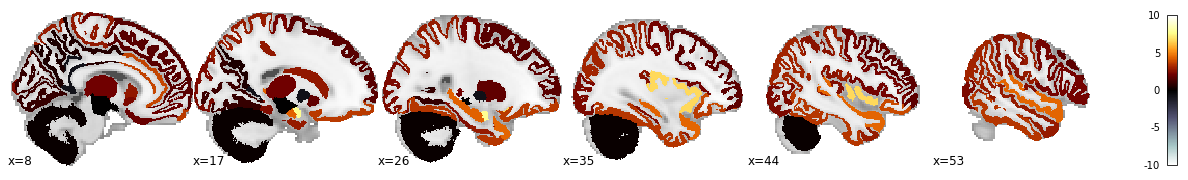

In [109]:
#imgO.shape
m=0
for i in labels['Id']:
    if i==47:
        i=45#this is miscoded in image code text file
    ind=np.where(imgM==i)
    #imgO[ind]=fincode['value'][m]
    w=labels['pointer'][m]
    if w != 'na':
      t=np.transpose(volsga).iloc[w].mean()
      imgO[ind]=t
    m=m+1
#ind=np.where(imgM==2035)
outimg = new_img_like(img, imgO)

#plotting.plot_stat_map(outimg, display_mode='x', symmetric_cbar=True, colorbar=True, vmax=10, cut_coords=[53,44,35,26,17,8], cmap='hot_black_bone_r', output_file='/Data/SGA_VOLUME_ch.png')
plotting.plot_stat_map(outimg, display_mode='x', symmetric_cbar=True, colorbar=True, vmax=10, cut_coords=[53,44,35,26,17,8], cmap='hot_black_bone_r')

In [159]:
cogsga_pivot=pd.pivot_table(cogsga,index='grid', columns='time', values=['Overall_TScore.0', 'SpeedProcessing_TScore.0',
       'Attention_Vigilance_TScore.0', 'Working_Memory_TScore.0',
       'Verbal_Learning_TScore.0', 'Visual_Learning_TScore.0',
       'Reason_ProblemSolv_TScore.0', 'Social_Cognition_TScore.0'])
cogsgadf = pd.DataFrame(cogsga_pivot.to_records())
cogsgadf.columns=['grid',
       'Attention_Vigilance_TScore.0','Attention_Vigilance_TScore.8', 'Overall_TScore.0','Overall_TScore.8',
       'Reason_ProblemSolv_TScore.0','Reason_ProblemSolv_TScore.8','Social_Cognition_TScore.0','Social_Cognition_TScore.8','SpeedProcessing_TScore.0','SpeedProcessing_TScore.8','Verbal_Learning_TScore.0','Verbal_Learning_TScore.8',
       'Visual_Learning_TScore.0','Visual_Learning_TScore.8','Working_Memory_TScore.0','Working_Memory_TScore.8']
cogsgadf

,grid,Attention_Vigilance_TScore.0,Attention_Vigilance_TScore.8,Overall_TScore.0,Overall_TScore.8,Reason_ProblemSolv_TScore.0,Reason_ProblemSolv_TScore.8,Social_Cognition_TScore.0,Social_Cognition_TScore.8,SpeedProcessing_TScore.0,SpeedProcessing_TScore.8,Verbal_Learning_TScore.0,Verbal_Learning_TScore.8,Visual_Learning_TScore.0,Visual_Learning_TScore.8,Working_Memory_TScore.0,Working_Memory_TScore.8
0,1b8f3f44cda09d3a95ef064c1b137445,36.0,11.0,39.0,-1.0,64.0,39.0,39.0,16.0,46.0,3.0,32.0,20.0,42.0,22.0,43.0,16.0
1,34684166b41c6ebfc697fb557ced7140,29.0,42.0,36.0,42.0,40.0,41.0,65.0,70.0,42.0,43.0,37.0,41.0,45.0,43.0,32.0,35.0
2,6437132f3fb4afb997f538807251c30a,46.0,38.0,33.0,32.0,42.0,48.0,38.0,32.0,38.0,38.0,28.0,29.0,51.0,51.0,34.0,38.0
3,7c84894e451f799d8e928d07e14acaca,14.0,22.0,-1.0,12.0,33.0,33.0,22.0,30.0,-5.0,13.0,16.0,35.0,38.0,27.0,10.0,25.0
4,83ab31ec164ec1507072b9e522422931,31.0,18.0,15.0,5.0,37.0,46.0,29.0,22.0,26.0,17.0,28.0,22.0,24.0,12.0,22.0,18.0
5,a747faf8c71a33eb0ce1ed14013beae9,21.0,20.0,21.0,11.0,60.0,44.0,22.0,18.0,45.0,30.0,28.0,29.0,16.0,21.0,33.0,21.0
6,c2e88017485b6c3b7ecc7fc567e9ba7e,16.0,34.0,13.0,41.0,31.0,54.0,25.0,48.0,24.0,45.0,25.0,42.0,41.0,39.0,27.0,46.0
7,c51f1ab9d083c2627488624a9dbfa104,35.0,45.0,28.0,34.0,50.0,32.0,38.0,48.0,39.0,47.0,27.0,35.0,25.0,28.0,42.0,43.0
8,c9e39571ab70bd3d715e2a7b93e3589b,44.0,43.0,37.0,36.0,34.0,27.0,47.0,47.0,42.0,40.0,34.0,40.0,30.0,41.0,64.0,53.0
9,e35f2445760d79b19bf9c59e2071b40e,NaN,13.0,NaN,6.0,33.0,32.0,35.0,28.0,-3.0,-1.0,25.0,34.0,21.0,38.0,13.0,17.0


In [160]:

cogsgadf[['grid','Overall_TScore.0','Overall_TScore.8','SpeedProcessing_TScore.0','SpeedProcessing_TScore.8',
       'Attention_Vigilance_TScore.0','Attention_Vigilance_TScore.8',
       'Working_Memory_TScore.0','Working_Memory_TScore.8',
       'Verbal_Learning_TScore.0','Verbal_Learning_TScore.8',
       'Visual_Learning_TScore.0','Visual_Learning_TScore.8',
       'Reason_ProblemSolv_TScore.0','Reason_ProblemSolv_TScore.8',
       'Social_Cognition_TScore.0','Social_Cognition_TScore.8']]
#imputing one baseline # see R code
k=np.where(cogsgadf['grid']== 'e35f2445760d79b19bf9c59e2071b40e')
cogsgadf['Overall_TScore.0'].iloc[k]=21
cogsgadf


[ simnibs ]WARNING: /root/SimNIBS/miniconda3/envs/simnibs_env/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



,grid,Attention_Vigilance_TScore.0,Attention_Vigilance_TScore.8,Overall_TScore.0,Overall_TScore.8,Reason_ProblemSolv_TScore.0,Reason_ProblemSolv_TScore.8,Social_Cognition_TScore.0,Social_Cognition_TScore.8,SpeedProcessing_TScore.0,SpeedProcessing_TScore.8,Verbal_Learning_TScore.0,Verbal_Learning_TScore.8,Visual_Learning_TScore.0,Visual_Learning_TScore.8,Working_Memory_TScore.0,Working_Memory_TScore.8
0,1b8f3f44cda09d3a95ef064c1b137445,36.0,11.0,39.0,-1.0,64.0,39.0,39.0,16.0,46.0,3.0,32.0,20.0,42.0,22.0,43.0,16.0
1,34684166b41c6ebfc697fb557ced7140,29.0,42.0,36.0,42.0,40.0,41.0,65.0,70.0,42.0,43.0,37.0,41.0,45.0,43.0,32.0,35.0
2,6437132f3fb4afb997f538807251c30a,46.0,38.0,33.0,32.0,42.0,48.0,38.0,32.0,38.0,38.0,28.0,29.0,51.0,51.0,34.0,38.0
3,7c84894e451f799d8e928d07e14acaca,14.0,22.0,-1.0,12.0,33.0,33.0,22.0,30.0,-5.0,13.0,16.0,35.0,38.0,27.0,10.0,25.0
4,83ab31ec164ec1507072b9e522422931,31.0,18.0,15.0,5.0,37.0,46.0,29.0,22.0,26.0,17.0,28.0,22.0,24.0,12.0,22.0,18.0
5,a747faf8c71a33eb0ce1ed14013beae9,21.0,20.0,21.0,11.0,60.0,44.0,22.0,18.0,45.0,30.0,28.0,29.0,16.0,21.0,33.0,21.0
6,c2e88017485b6c3b7ecc7fc567e9ba7e,16.0,34.0,13.0,41.0,31.0,54.0,25.0,48.0,24.0,45.0,25.0,42.0,41.0,39.0,27.0,46.0
7,c51f1ab9d083c2627488624a9dbfa104,35.0,45.0,28.0,34.0,50.0,32.0,38.0,48.0,39.0,47.0,27.0,35.0,25.0,28.0,42.0,43.0
8,c9e39571ab70bd3d715e2a7b93e3589b,44.0,43.0,37.0,36.0,34.0,27.0,47.0,47.0,42.0,40.0,34.0,40.0,30.0,41.0,64.0,53.0
9,e35f2445760d79b19bf9c59e2071b40e,NaN,13.0,21.0,6.0,33.0,32.0,35.0,28.0,-3.0,-1.0,25.0,34.0,21.0,38.0,13.0,17.0


In [162]:
cogsgadf['speed']=cogsgadf['SpeedProcessing_TScore.8']-cogsgadf['SpeedProcessing_TScore.0']
cogsgadf['atten']=cogsgadf['Attention_Vigilance_TScore.8']-cogsgadf['Attention_Vigilance_TScore.0']
cogsgadf['womem']=cogsgadf['Working_Memory_TScore.8']-cogsgadf['Working_Memory_TScore.0']
cogsgadf['velea']=cogsgadf['Verbal_Learning_TScore.8']-cogsgadf['Verbal_Learning_TScore.0']
cogsgadf['vilea']=cogsgadf['Visual_Learning_TScore.8']-cogsgadf['Visual_Learning_TScore.0']
cogsgadf['proso']=cogsgadf['Reason_ProblemSolv_TScore.8']-cogsgadf['Reason_ProblemSolv_TScore.0']
cogsgadf['socog']=cogsgadf['Social_Cognition_TScore.8']-cogsgadf['Social_Cognition_TScore.0']
cogsgadf['dcog8']=cogsgadf['Overall_TScore.8']-cogsgadf['Overall_TScore.0']


cogsgadf[['grid','speed','atten','womem','velea','vilea','proso','socog','dcog8']]

,grid,speed,atten,womem,velea,vilea,proso,socog,dcog8
0,1b8f3f44cda09d3a95ef064c1b137445,-43.0,-25.0,-27.0,-12.0,-20.0,-25.0,-23.0,-40.0
1,34684166b41c6ebfc697fb557ced7140,1.0,13.0,3.0,4.0,-2.0,1.0,5.0,6.0
2,6437132f3fb4afb997f538807251c30a,0.0,-8.0,4.0,1.0,0.0,6.0,-6.0,-1.0
3,7c84894e451f799d8e928d07e14acaca,18.0,8.0,15.0,19.0,-11.0,0.0,8.0,13.0
4,83ab31ec164ec1507072b9e522422931,-9.0,-13.0,-4.0,-6.0,-12.0,9.0,-7.0,-10.0
5,a747faf8c71a33eb0ce1ed14013beae9,-15.0,-1.0,-12.0,1.0,5.0,-16.0,-4.0,-10.0
6,c2e88017485b6c3b7ecc7fc567e9ba7e,21.0,18.0,19.0,17.0,-2.0,23.0,23.0,28.0
7,c51f1ab9d083c2627488624a9dbfa104,8.0,10.0,1.0,8.0,3.0,-18.0,10.0,6.0
8,c9e39571ab70bd3d715e2a7b93e3589b,-2.0,-1.0,-11.0,6.0,11.0,-7.0,0.0,-1.0
9,e35f2445760d79b19bf9c59e2071b40e,2.0,NaN,4.0,9.0,17.0,-1.0,-7.0,-15.0


In [191]:
bprs=pd.read_csv('/Data/bprs_cr.csv')
bp=bprs[['GRID','cr']].drop_duplicates()
bp.columns=['grid','cr']
bp

,grid,cr
0,0576953b90a5f627bd7f8af9a979dd33,-2.697799
9,1b8f3f44cda09d3a95ef064c1b137445,0.662418
18,34684166b41c6ebfc697fb557ced7140,-0.070685
26,6437132f3fb4afb997f538807251c30a,0.602322
35,7c84894e451f799d8e928d07e14acaca,1.135475
44,83ab31ec164ec1507072b9e522422931,0.223228
53,a747faf8c71a33eb0ce1ed14013beae9,0.044443
62,c2e88017485b6c3b7ecc7fc567e9ba7e,-0.400541
71,c51f1ab9d083c2627488624a9dbfa104,-1.445995
78,c9e39571ab70bd3d715e2a7b93e3589b,0.970215


In [211]:
alld1 = volsga[volsga.columns[0:47]].merge(cogsgadf[['grid','speed','atten','womem','velea','vilea','proso','socog','dcog8']], on='grid', how='left')
alld = pd.merge(alld1,bp, on='grid')
alld.columns[5:56]

Index(['Thalamus.Proper', 'Caudate', 'Putamen', 'Pallidum', 'Hippocampus',
       'Amygdala', 'Accumbens.area', 'VentralDC',
       'ctx.caudalanteriorcingulate', 'ctx.caudalmiddlefrontal', 'ctx.cuneus',
       'ctx.entorhinal', 'ctx.fusiform', 'ctx.inferiorparietal',
       'ctx.inferiortemporal', 'ctx.isthmuscingulate', 'ctx.lateraloccipital',
       'ctx.lateralorbitofrontal', 'ctx.lingual', 'ctx.medialorbitofrontal',
       'ctx.middletemporal', 'ctx.parahippocampal', 'ctx.paracentral',
       'ctx.parsopercularis', 'ctx.parsorbitalis', 'ctx.parstriangularis',
       'ctx.pericalcarine', 'ctx.postcentral', 'ctx.posteriorcingulate',
       'ctx.precentral', 'ctx.precuneus', 'ctx.rostralanteriorcingulate',
       'ctx.rostralmiddlefrontal', 'ctx.superiorfrontal',
       'ctx.superiorparietal', 'ctx.superiortemporal', 'ctx.supramarginal',
       'ctx.frontalpole', 'ctx.temporalpole', 'ctx.transversetemporal',
       'ctx.insula', 'VOL.TotalGrayVol', 'speed', 'atten', 'womem', 'velea',

In [212]:
found=alld.columns[4:56]
domains=['speed','atten','womem','velea','vilea','proso','socog','dcog8','cr']
found


Index(['Cerebellum.Cortex', 'Thalamus.Proper', 'Caudate', 'Putamen',
       'Pallidum', 'Hippocampus', 'Amygdala', 'Accumbens.area', 'VentralDC',
       'ctx.caudalanteriorcingulate', 'ctx.caudalmiddlefrontal', 'ctx.cuneus',
       'ctx.entorhinal', 'ctx.fusiform', 'ctx.inferiorparietal',
       'ctx.inferiortemporal', 'ctx.isthmuscingulate', 'ctx.lateraloccipital',
       'ctx.lateralorbitofrontal', 'ctx.lingual', 'ctx.medialorbitofrontal',
       'ctx.middletemporal', 'ctx.parahippocampal', 'ctx.paracentral',
       'ctx.parsopercularis', 'ctx.parsorbitalis', 'ctx.parstriangularis',
       'ctx.pericalcarine', 'ctx.postcentral', 'ctx.posteriorcingulate',
       'ctx.precentral', 'ctx.precuneus', 'ctx.rostralanteriorcingulate',
       'ctx.rostralmiddlefrontal', 'ctx.superiorfrontal',
       'ctx.superiorparietal', 'ctx.superiortemporal', 'ctx.supramarginal',
       'ctx.frontalpole', 'ctx.temporalpole', 'ctx.transversetemporal',
       'ctx.insula', 'VOL.TotalGrayVol', 'speed', 'atte

In [234]:
from IPython.core.display import HTML
from scipy import stats
#df=pd.read_pickle('Data1')
#display(HTML(df.to_html()))
for i in range(0,8):
    myone = stats.ttest_1samp(alld[found],0, nan_policy='omit')
    sig = myone[1]<0.05
    #cc = pd.DataFrame(iper_ef_vol2[found].corr()['dcog12'])[:-2]
    cc = pd.DataFrame(alld[found].corr()[domains[i]])
    #onesamp = pd.DataFrame([myone[0],myone[1]]).T
    #onesamp.columns=['tval','pval']
    cohens=alld[found].mean()/alld[found].std()
    #mch=alld[found].mean()
    mch=alld[found].corr()['cr'].values

    onesamp = pd.DataFrame([mch,cohens.values,myone[1].data]).T
    onesamp.columns=['bprs','d','pval']
    onesamp.shape
    

    onesamp.index=cc.index
    onesamp['roi']=onesamp.index
    cc['roi']=cc.index
    if i==0:
        resiper= pd.merge(cc,onesamp)
        resiper2=resiper[0:]#.rename(columns={'dcog12':domains[i]})
    else:
        resiper2=pd.merge(cc,resiper2)
        #resiper2=resiper2.rename(columns={'dcog12':domains[i]})
#[cc,onesamp]
#[cc,onesamp]
#resiper.to_html('/work/SGAECT/sgaN12_cog_Hippocampus_VerbalLearning.html')
display(HTML(resiper2.to_html()))
#resiper2.to_csv('/Data/SGAECT_results_dcog8.csv')

,dcog8,roi,socog,proso,vilea,velea,womem,atten,speed,bprs,d,pval
0,0.436901,Cerebellum.Cortex,0.413814,0.043125,0.037200,0.229377,0.242002,0.435544,0.297434,-0.262645,1.110605e-01,6.845163e-01
1,0.460281,Thalamus.Proper,0.322881,0.339727,0.151900,0.416098,0.536687,0.265453,0.489575,-0.002136,1.056832e+00,1.648102e-03
2,0.221729,Caudate,0.066782,0.050714,0.177208,0.096682,0.112264,0.155699,0.111167,0.238107,6.447545e-01,3.134554e-02
3,0.271647,Putamen,0.057559,0.287494,0.346992,0.274060,0.321023,0.097287,0.329565,0.245065,5.467633e-01,6.156088e-02
4,-0.003372,Pallidum,0.224962,-0.071301,0.150929,-0.178977,0.073597,0.194839,-0.118255,-0.367215,-2.457643e-01,3.745478e-01
5,-0.581972,Hippocampus,-0.576620,-0.102762,0.261729,-0.658026,-0.467112,-0.446988,-0.594800,-0.614823,1.289372e+00,3.320139e-04
6,-0.112708,Amygdala,-0.078667,-0.552091,0.134857,0.019682,-0.317574,0.104352,-0.149349,-0.054670,1.035428e+00,1.917504e-03
7,-0.107226,Accumbens.area,-0.139918,0.263297,0.064489,-0.058621,0.109712,-0.127380,0.096428,0.053417,2.344420e-01,3.962989e-01
8,0.231451,VentralDC,0.203294,0.009223,0.256823,0.489670,0.262002,0.300139,0.329773,-0.126161,1.800930e-03,9.947258e-01
9,0.447878,ctx.caudalanteriorcingulate,0.390021,0.399415,0.129344,0.327470,0.596885,0.319460,0.509702,-0.130883,1.364654e+00,2.015874e-04
